# Preprocessing data

In [ ]:
!pip install datasets

* Text, use a Tokenizer to convert text into a sequence of tokens, create a numerical representation of the tokens, and assemble them into tensors.
* Speech and audio, use a FeatureExtractor to extract sequential features from audio waveforms and convert them into tensors.
* Image, use a ImageProcessor to convert images into tensors.
* Multimodal inputs, use a Processor to combine a tokenizer and a feature extractor or image processor.

## Natural Language Processing

A tokenizer splits text into *tokens* according to a set of rules. The tokens areconverted into numbers and then tensors, which become the model inputs. Any additional inputs required by the model are added by the tokenizer.

The `AutoTokenizer.from_pretrained()` method downloads the *vocabulary* a model was pretrained with:

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
text = "Do not meddle in the affairs of wizards, for they are subtle and quick to anger."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


* `input_ids` - the indices corresponding to each token in the sequence
* `attention_mask` - whether a token should be attended to or not
* `token_type_ids` - which sequence a token belongs to when there is more than one sequence

We can return our input by decoding the `input_ids`:

In [4]:
tokenizer.decode(encoded_text['input_ids'])

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger. [SEP]'

For multiple sentences,

In [6]:
batch_sentences = [
    'But what about second breakfast?',
    'Don\'t think he knows about second breakfast, Pip.',
    'What about elevensies?',
]

encoded_batch = tokenizer(batch_sentences)
print(encoded_batch)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


### Pad

Padding is a strategy for ensuring tensors are rectangular by adding a special *padding token* to shorter sentences.

In [7]:
batch_sentences = [
    'But what about second breakfast?',
    'Don\'t think he knows about second breakfast, Pip.',
    'What about elevensies?',
]

encoded_batch = tokenizer(batch_sentences,
                          padding=True) # add padding
print(encoded_batch)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


### Truncation

Sometimes a sequence may be too long for a model to handle.

In [8]:
batch_sentences = [
    'But what about second breakfast?',
    'Don\'t think he knows about second breakfast, Pip.',
    'What about elevensies?',
]

encoded_batch = tokenizer(batch_sentences,
                          padding=True,
                          truncation=True)
print(encoded_batch)

{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102, 0, 0, 0, 0, 0, 0, 0], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


### Build tensors

In [9]:
batch_sentences = [
    'But what about second breakfast?',
    'Don\'t think he knows about second breakfast, Pip.',
    'What about elevensies?',
]

encoded_batch = tokenizer(batch_sentences,
                          padding=True,
                          truncation=True,
                          return_tensors='pt') # return as pytorch tensors
print(encoded_batch)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   119,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


## Audio

For audio tasks, we need a feature extractor to prepare our dataset for the model. The feature extractor is designed to extract features from raw audio data, and convert them into tensors.

In [10]:
from datasets import load_dataset, Audio

dataset = load_dataset('PolyAI/minds14', name='en-US', split='train')

minds14.py:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [13]:
dataset[0]['audio']

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

which returns:
* `array` is the speech signal loaded - and potentially resampled - as a 1D array
* `path` points to the location of the audio file
* `sampling_rate` refers to how many data points in the speech signal are measured per second

In this section, we will use the Wav2Vec2 model, which is pretrained on 16kHz sampled speech audio. It is important that our audio data's sampling rate matches the sampling rate of the dataset used to pretrain the model.

In [14]:
# re-sampling
dataset = dataset.cast_column('audio',
                              Audio(sampling_rate=16000))

In [15]:
dataset[0]['audio']

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
         3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
 'sampling_rate': 16000}

Next, load a feature extractor to normalize and pad the input. When padding textual data, a `0` is added for shorter sequences. The same idea applies to audio data.

In [16]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/wav2vec2-base')

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [17]:
audio_input = [dataset[0]['audio']['array']]

feature_extractor(audio_input,
                  sampling_rate=16000)

{'input_values': [array([ 3.0293269e-04,  2.7676334e-03,  2.8821775e-03, ...,
        5.1470479e-04,  2.1597825e-05, -1.2164921e-04], dtype=float32)]}

Just like the tokenizer, we can apply padding or truncation to handle variable sequences in a batch.

In [18]:
dataset[0]['audio']['array'].shape

(173398,)

In [19]:
dataset[1]['audio']['array'].shape

(106496,)

Create a function to preprocess the dataset so the audio samples are the same length. Specify a maximum sample length, and the feature extractor will either pad or truncate the sequences to match it:

In [20]:
def preprocess_function(examples):
    audio_arrays = [x['array'] for x in examples['audio']]

    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=16000,
        padding=True,
        max_length=100000,
        truncation=True,
    )

    return inputs

In [21]:
processed_dataset = preprocess_function(dataset[:10])

In [22]:
processed_dataset["input_values"][0].shape

(100000,)

In [23]:
processed_dataset["input_values"][1].shape

(100000,)

## Computer vision

In [ ]:
from datasets import load_dataset

dataset = load_dataset('food101', split='train[:100]')

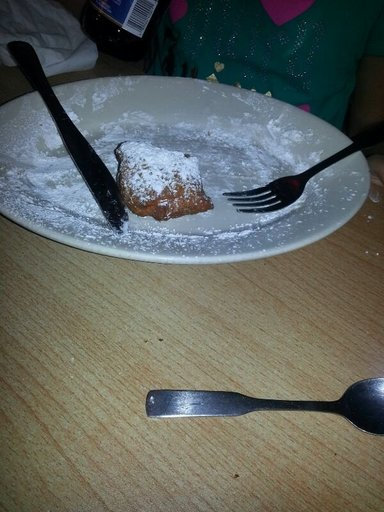

In [25]:
dataset[0]['image']

In [26]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


First, add some augmentation. We can use torchvision's `transforms` module, or the Albumentations or Kornia notebooks.

In [27]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size['shortest_edge']
    if 'shortest_edge' in image_processor.size
    else (image_processor.size['height'], image_processor.size['width'])
)

_transforms = Compose([
    RandomResizedCrop(size),
    ColorJitter(brightness=0.5, hue=0.5)
])

In [28]:
def transforms(examples):
    images = [_transforms(img.convert('RGB')) for img in examples['image']]
    examples['pixel_values'] = image_processor(images,
                                               do_resize=False,
                                               return_tensors='pt')['pixel_values']
    return examples

In [29]:
dataset.set_transform(transforms)

In [30]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

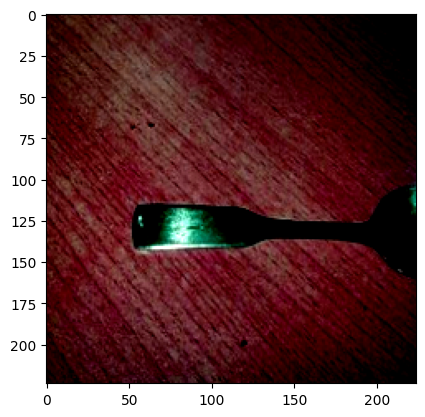

In [31]:
import numpy as np
import matplotlib.pyplot as plt

img = dataset[0]['pixel_values']
plt.imshow(img.permute(1, 2, 0))

### Pad

In some cases, for instance, when fine-tuning DETR, the model applies scale augmentation at training time. This may cause images to be different sizes in a batch. We can use `DetrImageProcessor.pad()` and define a custom `collate_fn` to batch image together

In [32]:
def collate_fn(batch):
    pixel_values = [item['pixel_values'] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors='pt')
    labels = [item['label'] for item in batch]
    batch = {}
    batch['pixel_values'] = encoding['pixel_values']
    batch['pixel_mask'] = encoding['pixel_mask']
    batch['labels'] = labels
    return batch

## Multimodal

A processor couples together two processing objects such as tokenizer and feature extractor.

In [33]:
from datasets import load_dataset

lj_speech = load_dataset('lj_speech', split='train')

lj_speech.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

The repository for lj_speech contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/lj_speech.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/13100 [00:00<?, ? examples/s]

For ASR, we are mainly focused on `audio` and `text` so we can remove the other columns:

In [34]:
lj_speech = lj_speech.remove_columns(['file', 'id', 'normalized_text'])

In [35]:
lj_speech[0]['audio']

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/917ece08c95cf0c4115e45294e3cd0dee724a1165b7fc11798369308a465bd26/LJSpeech-1.1/wavs/LJ001-0001.wav',
 'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
         7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
 'sampling_rate': 22050}

In [36]:
lj_speech[0]['text']

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

Remember that we should always resample our audio dataset's sampling rate to match the sampling rate of the dataset used to pretrain a model:

In [37]:
lj_speech = lj_speech.cast_column('audio',
                                  Audio(sampling_rate=16000))

Load a processor with AutoProcessor:

In [ ]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained('facebook/wav2vec2-base-960h')

Create a function to process the audio data contained in `array` to `input_values`, and tokenize `text` to `labels`. These are the inputs to the model:

In [39]:
def prepare_dataset(example):
    audio = example['audio']

    example.update(processor(audio=audio['array'],
                             text=example['text'],
                             sampling_rate=16000))

    return example

Apply the `prepare_dataset` function to a sample

In [40]:
prepare_dataset(lj_speech[0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/917ece08c95cf0c4115e45294e3cd0dee724a1165b7fc11798369308a465bd26/LJSpeech-1.1/wavs/LJ001-0001.wav',
  'array': array([-0.00061751, -0.00074496, -0.00068972, ...,  0.00068615,
          0.00013802,  0.        ]),
  'sampling_rate': 16000},
 'text': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'input_values': [array([-6.4672441e-03, -7.7975024e-03, -7.2209686e-03, ...,
          7.1398341e-03,  1.4186004e-03, -2.1961636e-05], dtype=float32)],
 'labels': [23,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  4,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  3,
  3,
  3,
  3,